In [97]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

# 1. The dataset given for this problem consists of data extracted from satellite images. The number of features is 36.

In [98]:
#Loading data from CSV

data = np.genfromtxt('PCA_practice_dataset.csv', delimiter = ',')

In [99]:
ls = []
for i in range(data.shape[1]):
    arr = data[:,i]
    arr = arr.reshape(1, arr.shape[0])
    ls.append(np.ravel(arr))
    
matrix_ls = np.matrix(ls)
matrix_ls.shape

mean_img = np.mean(matrix_ls, axis = 0)

cov_mat = np.cov(matrix_ls)
cov_mat.shape

(35, 35)

In [100]:
eig_val, eig_vec = np.linalg.eig(cov_mat)

In [101]:
# Find the right singular matrix

eig_vec_ls = []

for i in range(eig_vec.shape[1]):
    eig1 = matrix_ls.T@eig_vec[:,i]
    eig1 = eig1/eig_val[i]
    eig_vec_ls.append(np.ravel(eig1))
eig_vec_ls[0].shape

(8042,)

# 2. Reduce the dimensionality of the dataset using PCA. The threshold limits for the eigenvalues should be varied from 0.9 to 0.97 in steps of 0.01.

# 3. Obtain the Scree plot for each of these cases. Find the number of principal components retained due to the thresholding.

Threshold Value : 0.9
No. of components is 3


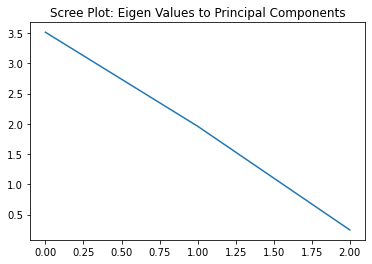

Threshold Value : 0.91
No. of components is 3


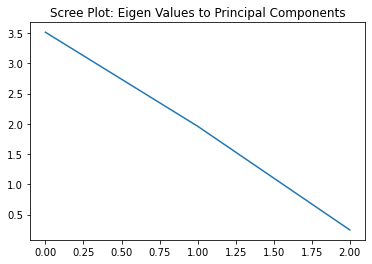

Threshold Value : 0.92
No. of components is 4


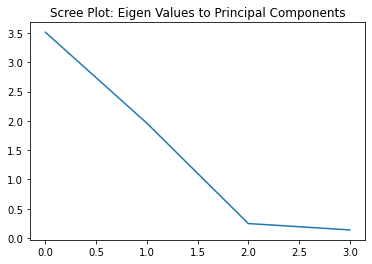

Threshold Value : 0.93
No. of components is 4


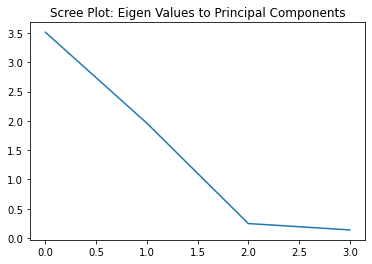

Threshold Value : 0.94
No. of components is 5


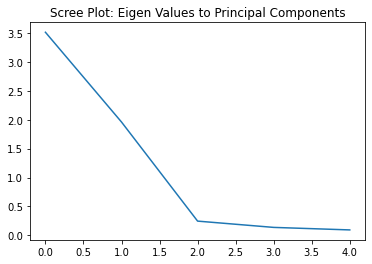

Threshold Value : 0.95
No. of components is 5


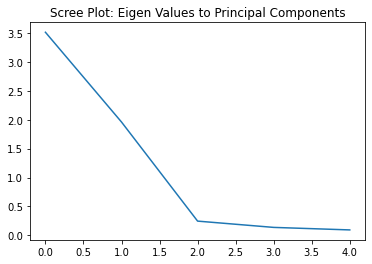

Threshold Value : 0.96
No. of components is 6


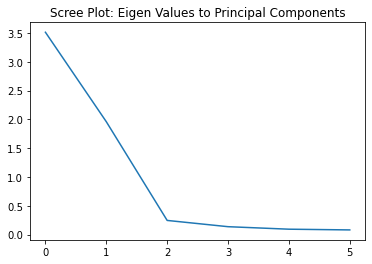

Threshold Value : 0.97
No. of components is 7


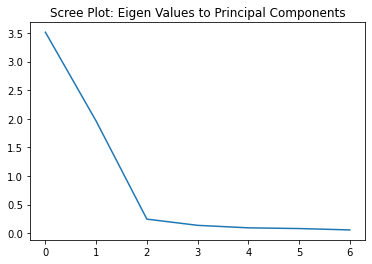

In [106]:
# Find Principle Components

sort_idx = np.argsort(eig_val)
sort_idx = sort_idx[::-1]

eig_val_sum = np.sum(eig_val)

for thres_limit in range(90,98,1):
    
    temp_sum = 0
    principal_eig_vec = []
    principal_eig_val = []
    i= 0
    
    while temp_sum < (thres_limit/100)*eig_val_sum:
        principal_eig_val.append(eig_val[sort_idx[i]])
        principal_eig_vec.append(eig_vec[sort_idx[i]])
        temp_sum += eig_val[sort_idx[i]]
        i += 1
    print(f'Threshold Value : {thres_limit/100}')
    print(f'No. of components is {i}')
    
    ## Find Transformation Matrix Q
    
    Q_hat = np.matrix(principal_eig_vec)
    Q = np.linalg.pinv(Q_hat)

    plt.title('Scree Plot: Eigen Values to Principal Components')
    plt.plot(principal_eig_val)
    plt.show()